# Imports

In [1]:
import torch
import platform
import numpy as np

import dlc_practical_prologue as dlc
from torchvision.utils import make_grid

print('Python version <{}>'.format(platform.python_version()))
print('PyTorch version <{}>'.format(torch.__version__))

Python version <3.6.8>
PyTorch version <1.0.1.post2>


In [6]:
from matplotlib import pyplot as plt
%matplotlib inline

# Data & Constants

In [3]:
from constants import N
print(f'size of training and test sets = {N}')

train_input, train_target, train_classes,\
test_input, test_target, test_classes = dlc.generate_pair_sets(N)
print(f'shape is {train_input.shape}')

size of training and test sets = 1000


/usr/local/lib/python3.6/site-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/site-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.6/site-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/site-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


shape is torch.Size([1000, 2, 14, 14])


In [4]:
def show_img(img):
    plt.imshow(img)
    plt.show()

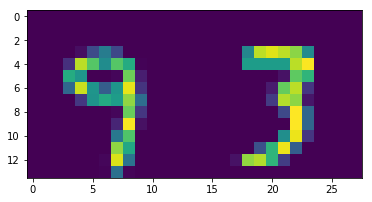

(tensor(0), tensor([9, 3]))

In [5]:
show_img(make_grid(train_input[0].unsqueeze(1), padding=0)[0])
train_target[0], train_classes[0]

# Models Comparison

In [1]:
import torch
from torch import nn

from evaluation import evaluate_model
from models import SimpleNN, SimpleCNN

## Only fully connected (baseline) 
(with left and right shared net or not)

In [2]:
loss_fc, acc_fc = evaluate_model(SimpleNN, num_epochs=40, num_rounds=5);

Model #parameters = 4181



/usr/local/lib/python3.6/site-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/site-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.6/site-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/site-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")
/opt/app/projects/DeepLearningProjects/Proj1/models.py:40: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  aux_out = torch.cat((F.softmax(out_left), F.softmax(out_right)), dim=1)


Best validation accuracy (mean over 5 rounds) = 0.8111
and standard deviation = 0.0232

Evaluation complete in 0m 15s


## Baseline with aux loss

In [3]:
loss_fc_aux, acc_fc_aux = evaluate_model(SimpleNN, num_epochs=40, num_rounds=5, with_aux_classes=True);

Model #parameters = 4181

Best validation accuracy (mean over 5 rounds) = 0.8184
and standard deviation = 0.0218

Evaluation complete in 0m 18s


## CNN

In [4]:
loss_cnn, acc_cnn = evaluate_model(SimpleCNN, num_epochs=40, num_rounds=2);

Model #parameters = 3261



/opt/app/projects/DeepLearningProjects/Proj1/models.py:84: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  aux_out = torch.cat((F.softmax(out_left), F.softmax(out_right)), dim=1)


Best validation accuracy (mean over 2 rounds) = 0.8467
and standard deviation = 0.0041

Evaluation complete in 1m 43s


## CNN with aux loss

In [5]:
loss_cnn_aux, acc_cnn_aux = evaluate_model(SimpleCNN, num_epochs=40, num_rounds=2, with_aux_classes=True);

Model #parameters = 3261

Best validation accuracy (mean over 2 rounds) = 0.8755
and standard deviation = 0.0090

Evaluation complete in 1m 46s


# PLOTS

In [7]:
accuracies = [acc_fc, acc_fc_aux, acc_cnn, acc_cnn_aux]
losses = [loss_fc, loss_fc_aux, loss_cnn, loss_cnn_aux]
names = ['FC', 'FC_aux', 'CNN', 'CNN_aux']

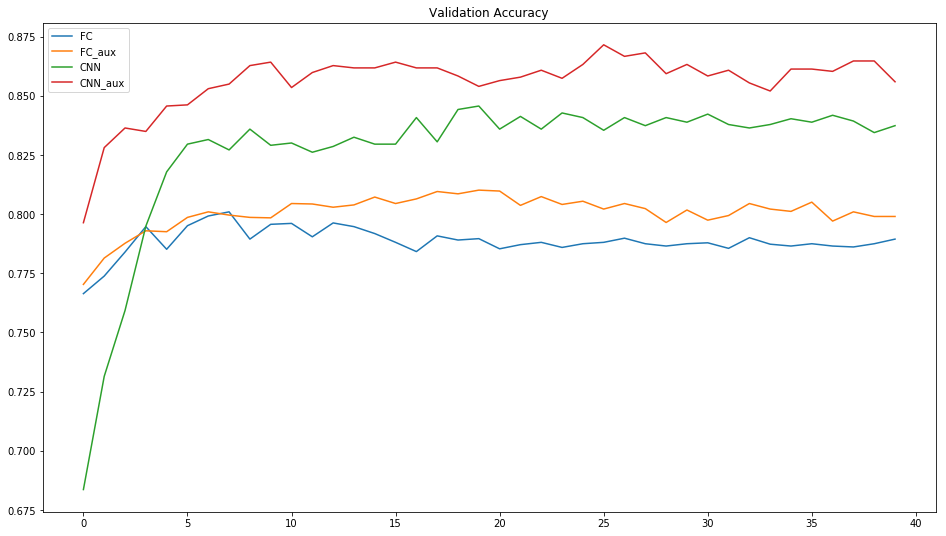

In [8]:
plt.figure(figsize=(16,9))
plt.title('Validation Accuracy')
plt.plot(torch.cat(
    [torch.mean(acc['val'], dim=0, keepdim=True) for acc in accuracies]
).transpose(1,0).numpy())
plt.legend(names)
plt.show()

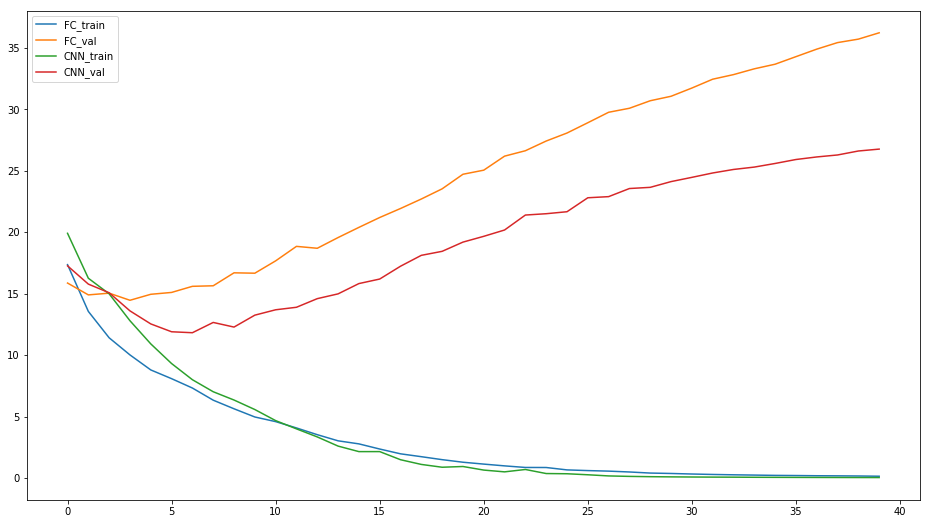

In [9]:
plt.figure(figsize=(16,9))
plt.plot(torch.cat([
    torch.mean(loss_fc['train'], dim=0, keepdim=True),
    torch.mean(loss_fc['val'], dim=0, keepdim=True),
    torch.mean(loss_cnn['train'], dim=0, keepdim=True),
    torch.mean(loss_cnn['val'], dim=0, keepdim=True),
]).transpose(1,0).numpy())
plt.legend(['FC_train', 'FC_val', 'CNN_train', 'CNN_val'])
plt.show()

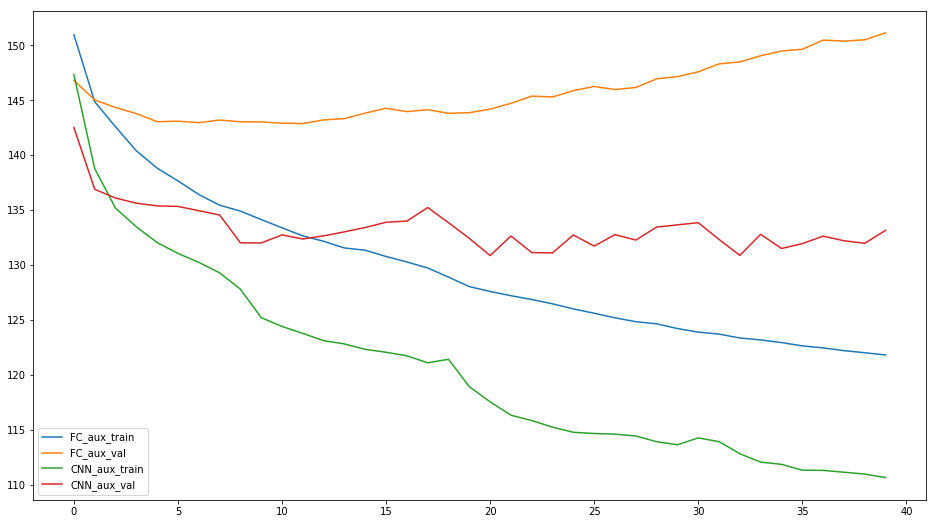

In [10]:
plt.figure(figsize=(16,9))
plt.plot(torch.cat([
    torch.mean(loss_fc_aux['train'], dim=0, keepdim=True),
    torch.mean(loss_fc_aux['val'], dim=0, keepdim=True),
    torch.mean(loss_cnn_aux['train'], dim=0, keepdim=True),
    torch.mean(loss_cnn_aux['val'], dim=0, keepdim=True),
]).transpose(1,0).numpy())
plt.legend(['FC_aux_train', 'FC_aux_val', 'CNN_aux_train', 'CNN_aux_val'])
plt.show()